# <span style="color:#0b486b">  FIT3181: Deep Learning (2023)</span>

***
*Speaker:*  **Dr Lim-Chern Hong** \[lim.chernhong@monash.edu\]
<br/>

***

# <span style="color:#ec8428">Part 1: Deep Neural Networks (DNN) with TensorFlow</span>
**This handson demonstrates how to implement a Deep Neural Network using tensorflow keras**.   




***

## <span style="color:#ec8428"> A simple Deep Neural Network architecture </span>

We will implement an easy deep NNs with **one** input layer, **two** hidden layers, and **one** output layer. Its architecture will be specified as: $4 \rightarrow 8 (ReLU) \rightarrow 10 (ReLU) \rightarrow 3$. This means:
- Input size is 4
- First layer has 8 hidden units with ReLU activation function
- Second layer has 10 hidden units with ReLU activiation function
- And output layer is logit layer with 3 hidden units

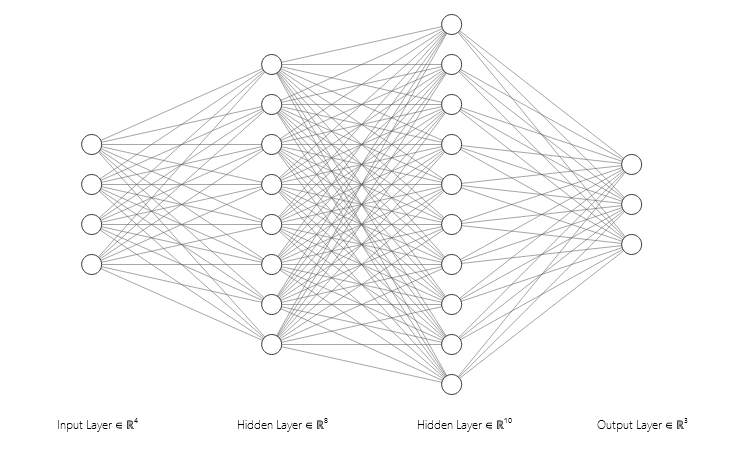

This network, for example, can take the `iris` dataset with an input of $4$ features and target label of $3$ classes (Setosa, Versicolor, Virginica). **Our objective in this tutorial is to implement this specific network in `TensorFlow 2.x`.**

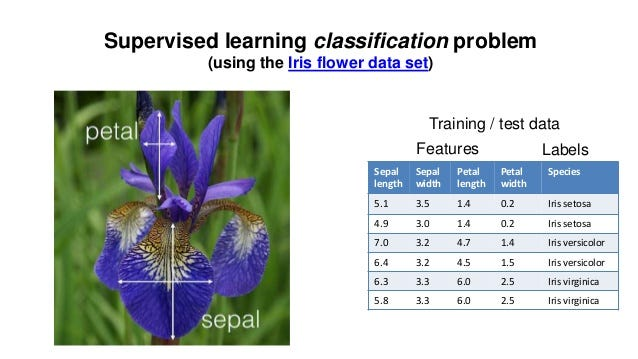

### <span style="color:#ec8428"> Implementation with TensorFlow 2.x</span>

In order to implement a full classification model, we need to follow the supervised machine learning pipeline.
The standard process of a supervised deep learning model is described as follows:

**Step 1: Data loading and processing**
   - Load the dataset and split into train, valid, and test sets.  

**Step 2: Implementation of DNN architecture**
   - Define the DNN model and construct the corresponding computational graph.
   - Define the loss function and the relevant measures of performance of interest (accuracy).
    
**Step 3: Training and evaluation**
   - Train the model using mini-batches from the train set by minimizing the loss function with an optimizer.
   - Predict on the test set and access its performance.

#### <span style="color:#ec8428">Step 1: Data loading and processing </span>

We first load the iris dataset from scikit-learn. **Note**, scikit-learn has a dataset repository that user may use it for testing.

In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import numpy as np

In [2]:
data = load_iris()
print(data.data)
print(data.target)
list(data.target_names)
X_data = data.data
y_data = data.target

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

Here we provide the utility to split the dataset to training, validation, and test data

In [3]:
def train_valid_test_split(data, target, train_size, valid_size, test_size):
    X_train, X_test, y_train, y_test = train_test_split(data, target, test_size = valid_size+test_size, random_state= 33)
    X_test, X_valid, y_test, y_valid = train_test_split(X_test, y_test, test_size = float(valid_size)/(valid_size+ test_size))
    return X_train, X_valid, X_test, y_train, y_valid, y_test

In [4]:
X_train, X_valid, X_test, y_train, y_valid, y_test = train_valid_test_split(X_data, y_data,
                                                                            train_size=0.8,
                                                                            valid_size=0.1,
                                                                            test_size=0.1)
y_train = y_train.reshape(-1)
y_test = y_test.reshape(-1)
y_valid = y_valid.reshape(-1)
print(X_train.shape, X_valid.shape, X_test.shape)
print(y_train.shape, y_valid.shape, y_test.shape)
print("lables: {}".format(np.unique(y_train)))

(120, 4) (15, 4) (15, 4)
(120,) (15,) (15,)
lables: [0 1 2]


Summary of the number of training data, number of feature, and number of class.

In [5]:
train_size = int(X_train.shape[0])
n_features = int(X_train.shape[1])
n_classes = len(np.unique(y_train))

print(train_size)
print(n_features)
print(n_classes)

120
4
3


#### <span style="color:#ec8428">Step 2: Implementation of DNN architecture </span>

Let's now build a deep neural network with the architecture: $4 \rightarrow 8 (ReLU) \rightarrow 10 (ReLU) \rightarrow 3$ in TensorFlow 2.x.

In [6]:
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

In [7]:
tf.random.set_seed(1234)

`Sequential` API is the easiest way to create Keras models. It allows us to specify a neural network **sequentially** by adding individual layers on top of one another. A sequential model is a plain stack of layers, which can be simply done by calling the `add()` method.

As shown below, we will add $2$ intermediate Dense layers with $ReLu$ activation function. The last one is the output layer with $Softmax$ activation that returns a probability output tensor of size equal to the number of classes to be predicted.

In [8]:
dnn_model = Sequential()
dnn_model.add(Dense(units=8,  input_shape=(4,), activation='relu'))
dnn_model.add(Dense(units=10, activation='relu'))
dnn_model.add(Dense(units=n_classes, activation='softmax'))

To finish the model construction, we call the `build()` method and call `summary()` to view the model setup.

In [9]:
dnn_model.build()
dnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 40        
                                                                 
 dense_1 (Dense)             (None, 10)                90        
                                                                 
 dense_2 (Dense)             (None, 3)                 33        
                                                                 
Total params: 163 (652.00 Byte)
Trainable params: 163 (652.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


You can further inspect the model components such as layers, their names, types as well as the parameters at each layer.

In [10]:
dnn_model.layers # returns a list of model layers

In [11]:
hidden1 = dnn_model.layers[0]
hidden1
print(hidden1.name) # returns the name of the first layer

dense


In [12]:
weights, biases = hidden1.get_weights()
weights.shape, biases.shape # returns the dimensions of the weight matrix and bias vector at the first layer

((4, 8), (8,))

#### <span style="color:#ec8428">Step 3: Execution and Evaluation</span>

Next, we use the `compile()` method to specify the training configurations, such as set the optimizer, loss function and evaluation metrics.

Optimizer: https://www.tensorflow.org/api_docs/python/tf/keras/optimizers

loss: https://www.tensorflow.org/api_docs/python/tf/keras/losses

metrics: https://www.tensorflow.org/api_docs/python/tf/keras/metrics

All possible args: https://www.tensorflow.org/api_docs/python/tf/keras/Model

In [13]:
dnn_model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

#### <span style="color:#ec8428">Training and Evaluating </span>

To train the model, we call the `fit()` method while inputting the training and validation data. The training progress will be printed out by default in your terminal. We now show you how to inspect the training output.

##### <span style="color:#ec8428"> Visualizing Training Progress </span>
In this example, we demonstrate on using history object to visualize training progress.

**Using History object**
The history object is the output of `fit()` method, which contains the training parameters `history.params`, the list of epochs `history.epoch`, and most importantly a dictionary `history.history` containing the loss and extra metrics evaluated at the end of each epoch on the training set and on the validation set (if any). The training need to complete before we can visualize using the history output.

In [14]:
from tensorflow import keras
# Call the fit method, passing the tensorboard_callback
history = dnn_model.fit(x=X_train, y=y_train, batch_size=16,
                        epochs=20,
                        validation_data=(X_valid, y_valid))

Epoch 1/20
8/8 [==============================] - 1s 71ms/step - loss: 1.1463 - accuracy: 0.3500 - val_loss: 1.1328 - val_accuracy: 0.2667
Epoch 2/20
8/8 [==============================] - 0s 7ms/step - loss: 1.0771 - accuracy: 0.4167 - val_loss: 1.0559 - val_accuracy: 0.4000
Epoch 3/20
8/8 [==============================] - 0s 7ms/step - loss: 1.0265 - accuracy: 0.4833 - val_loss: 1.0100 - val_accuracy: 0.4667
Epoch 4/20
8/8 [==============================] - 0s 6ms/step - loss: 0.9863 - accuracy: 0.5333 - val_loss: 0.9770 - val_accuracy: 0.5333
Epoch 5/20
8/8 [==============================] - 0s 7ms/step - loss: 0.9571 - accuracy: 0.5500 - val_loss: 0.9626 - val_accuracy: 0.5333
Epoch 6/20
8/8 [==============================] - 0s 6ms/step - loss: 0.9321 - accuracy: 0.5833 - val_loss: 0.9457 - val_accuracy: 0.6667
Epoch 7/20
8/8 [==============================] - 0s 7ms/step - loss: 0.9161 - accuracy: 0.6417 - val_loss: 0.9339 - val_accuracy: 0.6667
Epoch 8/20
8/8 [=================

We now can evaluate the trained model on the testing set or any subset.

In [15]:
dnn_model.evaluate(X_test, y_test)  #return loss and accuracy

1/1 [==============================] - 0s 40ms/step - loss: 0.7010 - accuracy: 1.0000


[0.7010017037391663, 1.0]

In [16]:
X_new = np.reshape(X_test[10, :], (1,-1))
y_prob = dnn_model.predict(X_new)
y_prob.round(2)

1/1 [==============================] - 0s 241ms/step


array([[0.64, 0.24, 0.12]], dtype=float32)

In [17]:
y_pred = np.argmax(dnn_model.predict(X_new), axis=-1)
if y_pred[0]==y_test[0]:
    print("Correct prediction !")
else:
    print("Incorrect prediction !")

1/1 [==============================] - 0s 32ms/step
Correct prediction !


#### <span style="color:#ec8428">Visualizing Model Performance and Loss Objective Function </span>

There are four keys in the history dictionary: `loss` and `val_loss` measure the loss on the training set and the validation set, respectively, while `accuracy` and `val_accuracy` measure the accuracy on the training set and the validation set.  

The following figure visualize all four metrics with two y-axes, losses (blue lines, in descending) and accuracies (red lines, in asending)

In [18]:
import pandas as pd
import matplotlib.pyplot as plt


his = history.history
fig = plt.figure(figsize=(8, 5))
ax = fig.add_subplot(111)
ln1 = ax.plot(his['loss'], 'b--',label='loss')
ln2 = ax.plot(his['val_loss'], 'b-',label='val_loss')
ax.set_ylabel('loss', color='blue')
ax.tick_params(axis='y', colors="blue")

ax2 = ax.twinx()
ln3 = ax2.plot(his['accuracy'], 'r--',label='accuracy')
ln4 = ax2.plot(his['val_accuracy'], 'r-',label='val_accuracy')
ax2.set_ylabel('accuracy', color='red')
ax2.tick_params(axis='y', colors="red")


lns = ln1 + ln2 + ln3 + ln4
labels = [l.get_label() for l in lns]
ax.legend(lns, labels)
plt.grid(True)
plt.show()

#### <span style="color:#ec8428">Save and Load Models</span>

There are different ways to save TensorFlow models depending on the API you are using. Since we are using the Keras model in this tutorial, saving and loading it is quite simple. It can be done by calling `model.save()` and `load_model()` methods.
When calling `model.save()`, the entire model will be saved including:
- The architecture, or configuration, which specifies what layers the model contain, and how they're connected.
- A set of weights values (the "state of the model").
- An optimizer (defined by compiling the model).
- A set of losses and metrics (defined by compiling the model or calling add_loss() or add_metric()).

In [19]:
# Saving the entire model to a directory
dnn_model.save('models/')

# Loading the model back
from tensorflow import keras
loaded_model = keras.models.load_model('models/')

# Checking the loaded model
print(dnn_model.predict(X_new) == loaded_model.predict(X_new))

1/1 [==============================] - 0s 99ms/step
[[ True  True  True]]


### <span style="color:#ec8428"> Other Approaches to Build Up Models with TensorFlow 2.x</span>

There are two approaches to build up a model with tensorflow 2.x, a simple method using **Sequential API** and a more flexible method using **Functional API**.  

#### <span style="color:#ec8428"> Approach 1: Using `Sequential API`</span>

In [20]:
dnn_model = Sequential()
dnn_model.add(Dense(units=8,  input_shape=(4,), activation='relu'))
dnn_model.add(Dense(units=10, activation='relu'))
dnn_model.add(Dense(units=n_classes, activation='softmax'))
dnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
dnn_model.fit(x=X_train, y=y_train, batch_size=32, epochs=20, validation_data=(X_valid, y_valid))

Epoch 1/20
4/4 [==============================] - 2s 156ms/step - loss: 1.0669 - accuracy: 0.4417 - val_loss: 1.0065 - val_accuracy: 0.4667
Epoch 2/20
4/4 [==============================] - 0s 32ms/step - loss: 1.0525 - accuracy: 0.4667 - val_loss: 1.0012 - val_accuracy: 0.5333
Epoch 3/20
4/4 [==============================] - 0s 28ms/step - loss: 1.0440 - accuracy: 0.4833 - val_loss: 1.0015 - val_accuracy: 0.5333
Epoch 4/20
4/4 [==============================] - 0s 25ms/step - loss: 1.0371 - accuracy: 0.4750 - val_loss: 0.9962 - val_accuracy: 0.5333
Epoch 5/20
4/4 [==============================] - 0s 77ms/step - loss: 1.0306 - accuracy: 0.4833 - val_loss: 0.9926 - val_accuracy: 0.5333
Epoch 6/20
4/4 [==============================] - 0s 63ms/step - loss: 1.0238 - accuracy: 0.4833 - val_loss: 0.9848 - val_accuracy: 0.5333
Epoch 7/20
4/4 [==============================] - 0s 53ms/step - loss: 1.0176 - accuracy: 0.4917 - val_loss: 0.9785 - val_accuracy: 0.5333
Epoch 8/20
4/4 [==========

#### <span style="color:#ec8428"> Approach 2: Using `Functional API`</span>

In [21]:
X = tf.keras.layers.Input(shape=(4,)) #declare input layer
h = Dense(units=8, activation= 'relu')(X)
h = Dense(units=10, activation= 'relu')(h)
h = Dense(units=3, activation= 'softmax')(h)
dnn_model = tf.keras.Model(inputs= X, outputs=h)
dnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
dnn_model.fit(x=X_train, y=y_train, batch_size=32, epochs=20, validation_data=(X_valid, y_valid))

Epoch 1/20
4/4 [==============================] - 2s 169ms/step - loss: 1.6910 - accuracy: 0.5500 - val_loss: 1.1332 - val_accuracy: 0.6667
Epoch 2/20
4/4 [==============================] - 0s 28ms/step - loss: 1.5575 - accuracy: 0.5250 - val_loss: 1.0675 - val_accuracy: 0.6667
Epoch 3/20
4/4 [==============================] - 0s 36ms/step - loss: 1.4383 - accuracy: 0.5250 - val_loss: 1.0141 - val_accuracy: 0.6667
Epoch 4/20
4/4 [==============================] - 0s 23ms/step - loss: 1.3219 - accuracy: 0.5167 - val_loss: 0.9614 - val_accuracy: 0.6667
Epoch 5/20
4/4 [==============================] - 0s 58ms/step - loss: 1.2198 - accuracy: 0.5167 - val_loss: 0.9271 - val_accuracy: 0.7333
Epoch 6/20
4/4 [==============================] - 0s 38ms/step - loss: 1.1406 - accuracy: 0.5167 - val_loss: 0.8958 - val_accuracy: 0.6667
Epoch 7/20
4/4 [==============================] - 0s 82ms/step - loss: 1.0798 - accuracy: 0.5167 - val_loss: 0.8704 - val_accuracy: 0.6667
Epoch 8/20
4/4 [==========

We can also declare a class inherited from `tf.keras.Model`

In [22]:
class MyDNN(tf.keras.Model):
    def __init__(self, n_classes= 3):
        super(MyDNN, self).__init__()
        self.n_classes = n_classes
        self.dense1 = tf.keras.layers.Dense(units=8, activation= 'relu')
        self.dense2 = tf.keras.layers.Dense(units=10, activation= 'relu')
        self.dense3 = tf.keras.layers.Dense(units=self.n_classes, activation= 'softmax')

    def call(self,X): #X is the input, method call specifies how to compute the output from the input X
        h = self.dense1(X)
        h = self.dense2(h)
        h = self.dense3(h)
        return h

dnn_model = MyDNN(n_classes= 3)
dnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
dnn_model.fit(x=X_train, y=y_train, batch_size=32, epochs=20, validation_data=(X_valid, y_valid))

Epoch 1/20
4/4 [==============================] - 3s 141ms/step - loss: 1.7194 - accuracy: 0.3500 - val_loss: 1.8668 - val_accuracy: 0.2667
Epoch 2/20
4/4 [==============================] - 0s 22ms/step - loss: 1.6018 - accuracy: 0.3500 - val_loss: 1.6791 - val_accuracy: 0.2667
Epoch 3/20
4/4 [==============================] - 0s 25ms/step - loss: 1.4889 - accuracy: 0.3500 - val_loss: 1.5143 - val_accuracy: 0.2667
Epoch 4/20
4/4 [==============================] - 0s 21ms/step - loss: 1.3971 - accuracy: 0.3500 - val_loss: 1.3597 - val_accuracy: 0.2667
Epoch 5/20
4/4 [==============================] - 0s 40ms/step - loss: 1.3022 - accuracy: 0.3500 - val_loss: 1.2396 - val_accuracy: 0.2667
Epoch 6/20
4/4 [==============================] - 0s 40ms/step - loss: 1.2258 - accuracy: 0.3500 - val_loss: 1.1307 - val_accuracy: 0.2667
Epoch 7/20
4/4 [==============================] - 0s 22ms/step - loss: 1.1487 - accuracy: 0.3500 - val_loss: 1.0516 - val_accuracy: 0.2667
Epoch 8/20
4/4 [==========

### <span style="color:#ec8428"> Implement DNN to classify Digits dataset</span>

We will load the Digits dataset from scikit learn library: https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html

Untitled.png

Each digit image is with 8x8 pixel and is represented as a vector of 64 value as the income to the DNN. It has 10 classes (0-9), and a total of 1797 samples.

In [23]:
from sklearn.datasets import load_digits
data = load_digits()
print(data.data)
print(data.target)
list(data.target_names)
X_data = data.data
y_data = data.target

train_size = len(X_data)
n_features = len(X_data[0])
n_classes = len(np.unique(y_data))

print(train_size)
print(n_features)
print(n_classes)

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]
[0 1 2 ... 8 9 8]
1797
64
10


Again, we separate the dataset into training, validation, and testing data

In [24]:
X_train, X_valid, X_test, y_train, y_valid, y_test = train_valid_test_split(X_data, y_data,
                                                                            train_size=0.8,
                                                                            valid_size=0.1,
                                                                            test_size=0.1)
y_train = y_train.reshape(-1)
y_test = y_test.reshape(-1)
y_valid = y_valid.reshape(-1)
print(X_train.shape, X_valid.shape, X_test.shape)
print(y_train.shape, y_valid.shape, y_test.shape)
print("lables: {}".format(np.unique(y_train)))

(1437, 64) (180, 64) (180, 64)
(1437,) (180,) (180,)
lables: [0 1 2 3 4 5 6 7 8 9]


We train the data using the MyDNN class defined above

In [25]:
dnn_model = MyDNN(n_classes= 10)
dnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = dnn_model.fit(x=X_train, y=y_train, batch_size=32,
                        epochs=50,
                        validation_data=(X_valid, y_valid))

Epoch 1/50
45/45 [==============================] - 1s 7ms/step - loss: 3.0898 - accuracy: 0.1176 - val_loss: 2.1871 - val_accuracy: 0.2056
Epoch 2/50
45/45 [==============================] - 0s 3ms/step - loss: 2.1784 - accuracy: 0.1955 - val_loss: 1.9473 - val_accuracy: 0.2722
Epoch 3/50
45/45 [==============================] - 0s 4ms/step - loss: 1.9665 - accuracy: 0.3062 - val_loss: 1.8004 - val_accuracy: 0.3556
Epoch 4/50
45/45 [==============================] - 0s 3ms/step - loss: 1.7661 - accuracy: 0.4071 - val_loss: 1.6412 - val_accuracy: 0.4944
Epoch 5/50
45/45 [==============================] - 0s 3ms/step - loss: 1.5639 - accuracy: 0.5010 - val_loss: 1.4378 - val_accuracy: 0.5556
Epoch 6/50
45/45 [==============================] - 0s 3ms/step - loss: 1.3720 - accuracy: 0.5588 - val_loss: 1.2792 - val_accuracy: 0.6111
Epoch 7/50
45/45 [==============================] - 0s 3ms/step - loss: 1.1954 - accuracy: 0.6333 - val_loss: 1.1229 - val_accuracy: 0.6389
Epoch 8/50
45/45 [==

We plot the training results as below.

In [26]:
import pandas as pd
import matplotlib.pyplot as plt


his = history.history
fig = plt.figure(figsize=(8, 5))
ax = fig.add_subplot(111)
ln1 = ax.plot(his['loss'], 'b--',label='loss')
ln2 = ax.plot(his['val_loss'], 'b-',label='val_loss')
ax.set_ylabel('loss', color='blue')
ax.tick_params(axis='y', colors="blue")

ax2 = ax.twinx()
ln3 = ax2.plot(his['accuracy'], 'r--',label='accuracy')
ln4 = ax2.plot(his['val_accuracy'], 'r-',label='val_accuracy')
ax2.set_ylabel('accuracy', color='red')
ax2.tick_params(axis='y', colors="red")


lns = ln1 + ln2 + ln3 + ln4
labels = [l.get_label() for l in lns]
ax.legend(lns, labels)
plt.grid(True)
plt.show()

### <span style="color:#ec8428"> Try it yourself </span>

**<span style="color:red">Exercise 1:</span>** implement your own DNN architecture and use it to train and classify the Digits dataset.

---
### <span style="color:#0b486b"> <div  style="text-align:center">**THE END**</div> </span>